In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from numpy.linalg import inv
import math
import cv2

In [3]:
cv2.__version__

'4.7.0'

In [4]:
# To read image from disk, we use
# cv2.imread function, in below method,
img = cv2.imread("geeksforgeeks.png", cv2.IMREAD_COLOR)
 
# Creating GUI window to display an image on screen
# first Parameter is windows title (should be in string format)
# Second Parameter is image array
cv2.imshow("image", img)
 
# To hold the window on screen, we use cv2.waitKey method
# Once it detected the close input, it will release the control
# To the next line
# First Parameter is for holding screen for specified milliseconds
# It should be positive integer. If 0 pass an parameter, then it will
# hold the screen until user close it.
cv2.waitKey(0)
 
# It is for removing/deleting created GUI window from screen
# and memory
cv2.destroyAllWindows()

: 

In [19]:
def func(x):
    return 1/x * np.log(x**2 + 1)

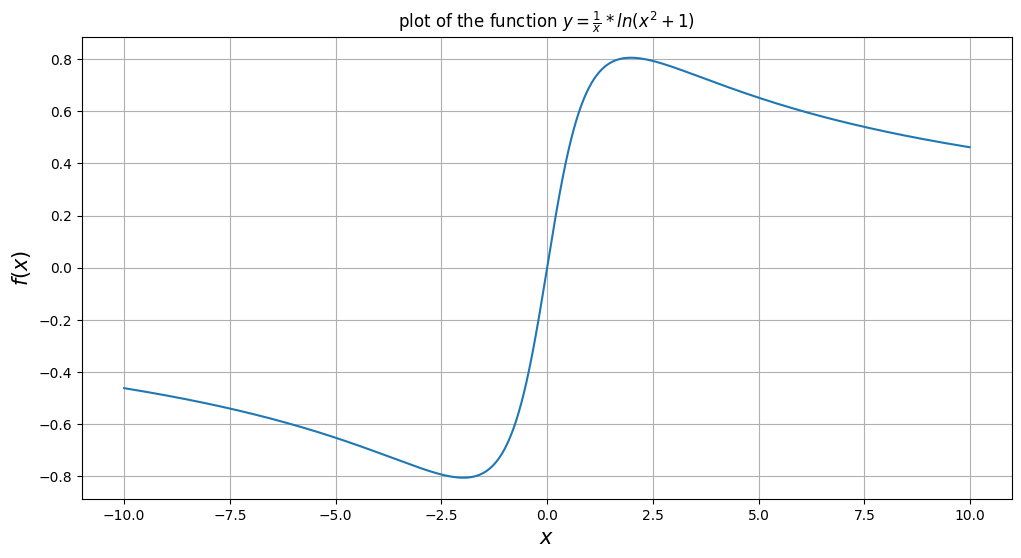

In [20]:
x = np.arange(-10, 10, 0.01)
plt.figure(figsize = (12,6))
plt.plot(x, func(x))
plt.title(r'plot of the function $y = \frac{1}{x}*ln(x^2 + 1)$')
plt.xlabel(r'$x$', fontsize = 15)
plt.ylabel(r'$f(x)$', fontsize = 15)
plt.grid(True)

In [34]:
x = np.array([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])
y = np.array([func(i) for i in x])
y[0] = 0
step = 0.25
print(y)

integral = 1.58505

[0.         0.24249849 0.4462871  0.59504947 0.69314718 0.75278668
 0.78577    0.80102774 0.80471896 0.80094323 0.79240059]


/var/folders/3h/fywk_2bj05b835jspdxg__2r0000gn/T/ipykernel_18712/1584250903.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/x * np.log(x**2 + 1)
/var/folders/3h/fywk_2bj05b835jspdxg__2r0000gn/T/ipykernel_18712/1584250903.py:2: RuntimeWarning: invalid value encountered in scalar multiply
  return 1/x * np.log(x**2 + 1)


$\int_{0}^{2.5} \frac{1}{x}*ln(x^2 + 1) \,dx$ = 1.58505

In [36]:
def calc_int_Simpson(step, func_vals):
    odd_sum  = 0
    even_sum = 0
    for i in range(1, len(func_vals) - 1):
        if i % 2 == 0:
            even_sum += func_vals[i]
        else:
            odd_sum += func_vals[i]
    return (func_vals[0] + 4 * odd_sum + 2 * even_sum + func_vals[-1]) * step / 3

def calc_int_trapeze(step, func_vals):
    return (sum(func_vals) - (func_vals[0] + func_vals[-1]) / 2) * step

def calc_int_rectangle(step, func_vals):
    sum = 0
    for i in range(len(func_vals) - 1):
        sum += func(x[i] + step/2)
    return sum * step

def calc_int_tr_Runge(step, func_vals):
    integral_trapeze = calc_int_trapeze(step, func_vals)
    sparse_func_vals = np.array([func_vals[2 * i] for i in range(len(func_vals) // 2 + len(func_vals) % 2)])
    integral_trapeze_sparse = calc_int_trapeze(2 * step, sparse_func_vals)

    return integral_trapeze + (integral_trapeze - integral_trapeze_sparse) / (2 ** 2 - 1)

def calc_int_rec_Runge(step, func_vals):
    integral_rectangle = calc_int_rectangle(step, func_vals)
    sparse_func_vals = np.array([func_vals[2 * i] for i in range(len(func_vals) // 2 + len(func_vals) % 2)])
    integral_rectangle_sparse = calc_int_rectangle(2 * step, sparse_func_vals)

    return integral_rectangle + (integral_rectangle - integral_rectangle_sparse) / (2 ** 2 - 1)

In [37]:
print('Simpson formula: ', calc_int_Simpson(step, y), 'error = ', abs(calc_int_Simpson(step, y) - integral))
print('Trapeze formula: ', calc_int_trapeze(step, y), 'error = ', abs(calc_int_trapeze(step, y) - integral))
print('Rectangle formula: ', calc_int_rectangle(step, y), 'error = ', abs(calc_int_rectangle(step, y) - integral))
print('Runge formula trapeze: ', calc_int_tr_Runge(step, y), 'error = ', abs(calc_int_tr_Runge(step, y) - integral))
print('Runge formula rectangle: ', calc_int_rec_Runge(step, y), 'error = ', abs(calc_int_rec_Runge(step, y) - integral))

Simpson formula:  1.5851224549673928 error =  7.245496739272106e-05
Trapeze formula:  1.579607282568023 error =  0.0054427174319771066
Rectangle formula:  1.5877729675069643 error =  0.0027229675069642134
Runge formula trapeze:  1.5851224549673923 error =  7.245496739227697e-05
Runge formula rectangle:  1.6620691373097938 error =  0.0770191373097937


In [38]:
def func2(x):
    return np.exp(-x*x)

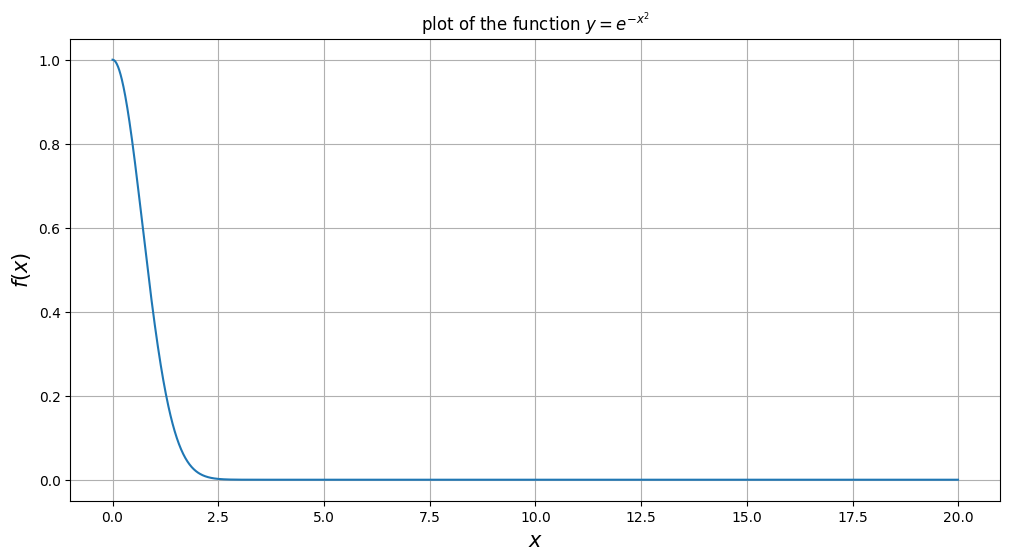

In [40]:
x = np.arange(0, 20, 0.01)
plt.figure(figsize = (12,6))
plt.plot(x, func2(x))
plt.title(r'plot of the function $y = e^{-x^2}$')
plt.xlabel(r'$x$', fontsize = 15)
plt.ylabel(r'$f(x)$', fontsize = 15)
plt.grid(True)

In [50]:

def calc_int_improp(x_0, f_max, epsilon, step):
    x_i = x_0 
    while func2(x_i) > f_max * epsilon:
        x_i += 0.001
    #print(x_i)
    x = np.arange(x_0, x_i, step)
    func_vals = np.array([func2(i) for i in x])
    integral = calc_int_tr_Runge(step, func_vals)
    return integral


In [53]:
f_max = 1
epsilon = 0.0001

print('Improper integral: ', calc_int_improp(0, f_max, epsilon, 0.001), ', error = ', abs(calc_int_improp(0, f_max, epsilon, 0.001) - math.sqrt(math.pi)/2))

Improper integral:  0.8862111424968822 , error =  1.5782955875787152e-05


In [ ]:
x = np.arrange([0, 2.5, h[]])

/var/folders/3h/fywk_2bj05b835jspdxg__2r0000gn/T/ipykernel_18712/1584250903.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/x * np.log(x**2 + 1)
/var/folders/3h/fywk_2bj05b835jspdxg__2r0000gn/T/ipykernel_18712/1584250903.py:2: RuntimeWarning: invalid value encountered in scalar multiply
  return 1/x * np.log(x**2 + 1)


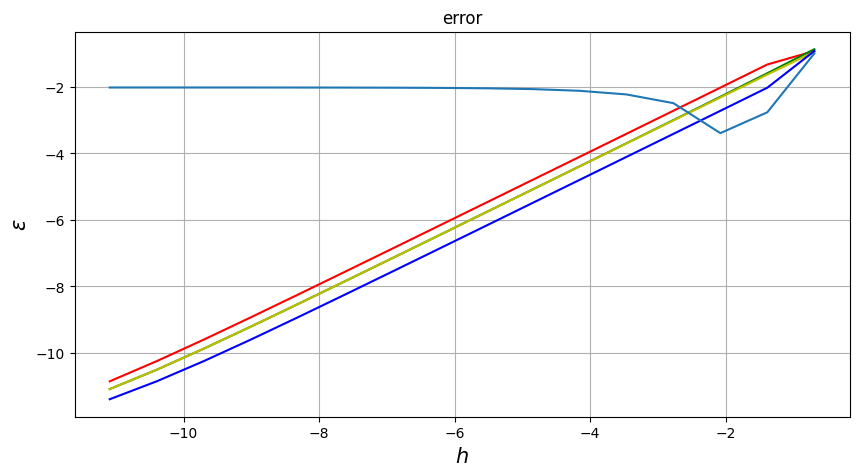

In [84]:
h = [1 / (2 ** i) for i in range(1, 17)]
error_sim =[]
error_trap = []
error_rec = []
error_tr_run = []
error_rec_run = []

for h_i in h:
    x = np.arange(0, 2.5, h_i)
    y = np.array([func(i) for i in x])
    y[0] = 0
    error_sim.append(abs(calc_int_Simpson(h_i, y) - integral))
    error_trap.append(abs(calc_int_trapeze(h_i, y) - integral))
    error_rec.append(abs(calc_int_rectangle(h_i, y) - integral))
    error_tr_run.append(abs(calc_int_tr_Runge(h_i, y) - integral))
    error_rec_run.append(abs(calc_int_rec_Runge(h_i, y) - integral))

error_sim_ln = np.log(error_sim)
error_trap_ln = np.log(error_trap)
error_rec_ln = np.log(error_rec)
error_tr_run_ln = np.log(error_tr_run)
error_rec_run_ln = np.log(error_rec_run)

h_ln = np.log(h)
plt.figure(figsize = (10,5))
plt.plot(h_ln, error_sim_ln, 'r', h_ln, error_trap_ln, 'g', h_ln, error_rec_ln, 'y', h_ln, error_tr_run_ln, 'b', h_ln, error_rec_run_ln)
plt.title(r'error')
plt.xlabel(r'$h$', fontsize = 15)
plt.ylabel(r'$\epsilon$', fontsize = 15)
plt.grid(True)
plt.show()

In [83]:
k_sim = (error_sim_ln[5] - error_sim_ln[4])/(h_ln[5] - h_ln[4])
print("k_sim = ", k_sim)

k_tr = (error_trap_ln[5] - error_trap_ln[4])/(h_ln[5] - h_ln[4])
print("k_trapeze = ", k_tr)

k_rec = (error_rec_ln[5] - error_rec_ln[4])/(h_ln[5] - h_ln[4])
print("k_rec = ", k_rec)

k_tr_runge = (error_tr_run_ln[5] - error_tr_run_ln[4])/(h_ln[5] - h_ln[4])
print("k_tr_runge = ", k_tr_runge)

k_rec_runge = (error_rec_run_ln[5] - error_rec_run_ln[4])/(h_ln[5] - h_ln[4])
print("k_rec_runge = ", k_rec_runge)

k_sim =  1.0007104885636384
k_trapeze =  1.002839369405085
k_rec =  0.9991540978632734
k_tr_runge =  0.999750581649088
k_rec_runge =  -0.15817374306500465
